# Hwk3 part 2

In [1]:
import torch
import utils
import random

# Problem 1

### The images from MNIST are 28 x 28. We are going to crop them so that they are only 20 x 20. To be more precise, we will remove 4 pixels from the top, bottom, left and right.

### Create a 60000x20x20 tensor that you will call "data_cropped" that contains a cropped version of the 60000 images from the training set. To do this you first need to download the trainset into a tensor that you will call "data", then you need to slice this tensor in order to make a tensor called "data_cropped". (Hint: look at the slicing tutorial at the end of the previous notebook)

In [2]:
# download the training data 
data=torch.load('../data/mnist/train_data.pt')
label=torch.load('../data/mnist/train_label.pt')

# crop the data 
data_cropped = data[:, 4:25, 4:25]

### Use this to check it worked:

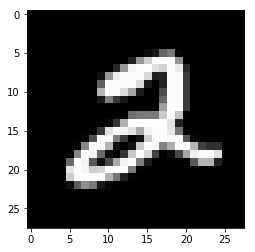

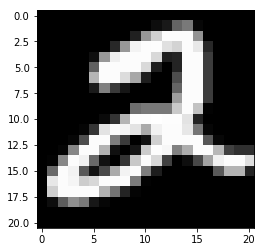

In [3]:
idx=5
utils.show(data[idx])
utils.show(data_cropped[idx])

# ----------------------------------------

# Problem 2

### Download the CIFAR training set into a tensor that you will call 'data'.  Then create a tensor 'data_red' that contains only the red channel of every image (this should be a 50000x32x32 tensor). Similarly, create a tensor 'data_green' and 'data_blue' (Hint: you just need to slice the data tensor).

In [4]:
# load CIFAR data 
data = torch.load('../data/cifar/train_data.pt')
print(data.size())
#split into colors 
data_red = data[:, 0, :, :]
data_green = data[:, 1, :, :]
data_blue = data[:, 2, :,:]

torch.Size([50000, 3, 32, 32])


### Use the code below to check it worked. Can you make sense of the 4 images? (For example, when looking at the blue channel, white means high blue intensity, and dark means low blue intensity)

torch.Size([50000, 32, 32])


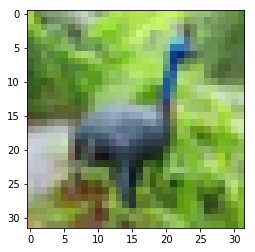

red channel


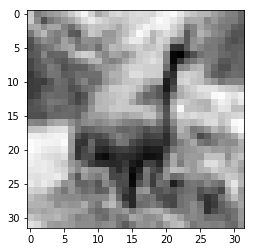

green channel


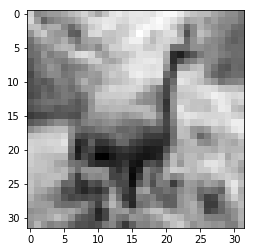

blue channel


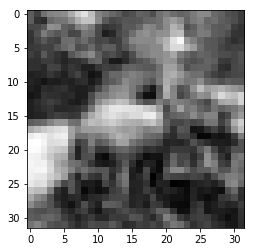

In [5]:
idx=6

print(data_blue.size())
utils.show(data[idx])

print('red channel')
utils.show(data_red[idx])
print('green channel')
utils.show(data_green[idx])
print('blue channel')
utils.show(data_blue[idx])


# ---------------------------------

# Problem 3 

### You are going to extract from the CIFAR training set all the images of bird and put them in a new tensor that you will call 'data_bird'.

### To do this you first need download the label tensor, and to figure out what is the label index corresponding to the bird category. Then make a python list containing all the images of birds (start with an empty list and use the append() method to build your list). This list should contain a big collection of 3-dimensional tensors. Then use the pytorch command called "torch.stack()" to convert this list of 3 dimensional tensors into a 4 dimensional tensor that you will call "data_bird". At the end of this notebook you can find an example of how to use the torch.stack() command. 

In [6]:
# download label data 
label = torch.load('../data/cifar/train_label.pt')
print(label.size())
#bird category is value of 2 (see above for image 6)
print(label[6])

emp_list = []
for i in range (0,50000):
    if label[i] == 2 : 
        emp_list.append(data[i,:,:,:])

data_bird = torch.stack(emp_list,dim=0)

torch.Size([50000])
tensor(2)


### The random.randint(a,b) command select a random integer between a and b (included -- don't ask me why). So use this line of code to check that your code is correct.

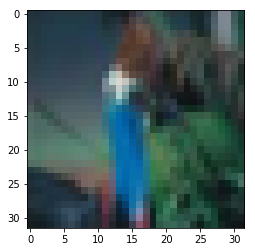

In [56]:
idx=random.randint(0,data_bird.size(0)-1 )
utils.show(data_bird[idx])

# ----------------------------------------------------------

# How to use the torch.stack() command.

In [40]:
x=torch.rand(5)
y=torch.rand(5)
z=torch.rand(5)
my_list=[x,y,z]

print(x)
print(y)
print(z)

tensor([0.4839, 0.3366, 0.3441, 0.9676, 0.4570])
tensor([0.9075, 0.9484, 0.2953, 0.6836, 0.6373])
tensor([0.3011, 0.3719, 0.8570, 0.1595, 0.6879])


In [41]:
A=torch.stack(my_list , dim=0)
print(A)

tensor([[0.4839, 0.3366, 0.3441, 0.9676, 0.4570],
        [0.9075, 0.9484, 0.2953, 0.6836, 0.6373],
        [0.3011, 0.3719, 0.8570, 0.1595, 0.6879]])


In [42]:
B=torch.stack(my_list , dim=1)
print(B)

tensor([[0.4839, 0.9075, 0.3011],
        [0.3366, 0.9484, 0.3719],
        [0.3441, 0.2953, 0.8570],
        [0.9676, 0.6836, 0.1595],
        [0.4570, 0.6373, 0.6879]])
